In [1]:
%%HTML
<style>
.container { width:100% } 
</style>

# Implementing Priority Queues as Heaps

Ths notebook presents <em style="color:blue">heaps</em>.  We define the set $\mathcal{H}$ of heaps by induction:

  - $\texttt{Nil} \in \mathcal{H}$.
  - $\texttt{Node}(p,v,l,r) \in \mathcal{H}$ if and only if the following is true:
      - $p \leq l \;\wedge\; p \leq r$

        The priority stored at the root is less than or equal to every other priority stored in
        the heap. This condition is known as the <em style="color:blue">heap condition</em>.
        
        It is important to remember that we associate <em style="color:blue">high</em> priorities
        with <em style="color:blue">small</em> numbers.
      - $\mid l.\texttt{count}() - r.\texttt{count}() \mid \;\leq\, 1$

        The number of elements in the left subtree differs from the number of elements stored in
        the right subtree by at most one.
        This condition is known as the  <em style="color:blue;">balancing condition</em>.  
      - $l \in \mathcal{H} \;\wedge\; r \in \mathcal{H}$
      
        Both the left and the right subtree of a heap are heaps.

The class `Heap` is a *superclass* for constructing heaps.  We will later define the classes `Nil` and `Node` that represent heaps of the form $\texttt{Nil}$ and $\texttt{Node}(p, v, l, r)$ respectively. The class `Heap` has one static variable `sNodeCount` which is needed to assign unique identifiers to different nodes.  Every object of class `Heap` has a uniques identifier `mID` that is stored as a member variable.  This identifier is used by `graphviz`.  In order to generate new identifiers we use the static variable `sNodeCount` as a counter.

In [2]:
class Heap:
    sNodeCount = 0
    
    def __init__(self):
        Heap.sNodeCount += 1
        self.mID = str(Heap.sNodeCount)
        
    def getID(self):
        return self.mID  # used only by graphviz

The function `make_string` is a helper function that is used to simplify the implementation of the method `__str__`.
  - `self` is the object that is to be rendered as a string
  - `attributes` is a list of the names of those member variables of the object `self`         that are used to create the string that is returned.

In [3]:
def _make_string(self, attributes):
        # get the name of the class of the object self
        name = self.__class__.__name__
        # map the function __str__ to all attributes and join them with a comma
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in attributes]))})"
    
Heap._make_string = _make_string

## Graphical Representation

In [4]:
import graphviz as gv

The method $t.\texttt{toDot}()$ takes a binary trie $t$ and returns a graph that depicts the tree $t$.

In [5]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if isinstance(t, Nil):
            dot.node(n, label='', shape='point') 
        elif isinstance(t, Node):
            if t.mValue != None:
                dot.node(n, label='{' + str(t.mPriority) + '|' + str(t.mValue) + '}')
            else:
                dot.node(n, label= str(t.mPriority))
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if isinstance(t, Node):
            dot.edge(n, t.mLeft .getID())
            dot.edge(n, t.mRight.getID())
    return dot

Heap.toDot = toDot

The method $t.\texttt{collectIDs}(d)$ takes a binary trie $t$ and a dictionary $d$ and updates the dictionary so that the following holds:
$$ d[\texttt{id}] = n \quad \mbox{for every node $n$ in $t$.} $$
Here, $\texttt{id}$ is the unique identifier of the node $n$, i.e. $d$ associates the identifiers with the corresponding nodes.

In [6]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if isinstance(self, Node):
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
        
Heap._collectIDs = _collectIDs

## Defining $\texttt{Nil}$ and $\texttt{Node}(p, v, l, r)$ as Classes

The class `Nil` represents an empty heap.  

In [7]:
class Nil(Heap):
    def __init__(self):
        Heap.__init__(self)

    def _count(self):
        return 0
    
    def __str__(self):
        return 'Nil()'

The class `Node` represents a heap of the form $\texttt{Node}(p,v,l,r)$ where
  - $p$ is the <em style="color:blue">priority</em> stored as `mPriority`,
  - $v$ is the <em style="color:blue">value</em> stored as `mValue`,
  - $l$ is the <em style="color:blue">left subtree</em> stored as `mLeft`,
  - $r$ is the <em style="color:blue">right subtree</em> stored as `mRight`,
  - The number of nodes is stored in the member variable `mCount`.

In [8]:
class Node(Heap):
    def __init__(self, priority, value, left, right):
        Heap.__init__(self)
        self.mPriority = priority
        self.mValue    = value
        self.mLeft     = left
        self.mRight    = right
        self.mCount    = left._count() + right._count() + 1
        
    def _extract(self):
        return self.mPriority, self.mValue, self.mLeft, self.mRight
    
    def _count(self):
        return self.mCount
    
    def __str__(self):
        return _make_string(self, ['mPriority', 'mValue', 'mLeft', 'mRight'])

## Implementing the Method  `top`

For the class `Nil`, the function `top`is specified via a single equation:
 - $\texttt{Nil}.\texttt{top}() = \Omega$

In [9]:
def top(self):
    return None

Nil.top = top

For the class `Node`, the function `top` is specified via the following equation:
- $\texttt{Node}(p,v,l,r).\texttt{top}() = (p,v)$

In [10]:
def top(self):
    return self.mPriority, self.mValue

Node.top = top
del top

## Implementing the method `insert`

 - $\texttt{Nil}.\texttt{insert}(p,v) = \texttt{Node}(p,v,\texttt{Nil}, \texttt{Nil})$

In [11]:
def insert(self, p, v):
    return Node(p, v, Nil(), Nil())

Nil.insert = insert

  - $p_{\mathrm{top}} \leq p \;\wedge\; l.\texttt{count}() \leq r.\texttt{count}() \;\rightarrow\; 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p_\mathrm{top},v_\mathrm{top},l.\texttt{insert}(p,v), r\bigr)$               
  - $p_{\mathrm{top}} \leq p \;\wedge\; l.\texttt{count}() > r.\texttt{count}() \;\rightarrow 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p_\mathrm{top},v_\mathrm{top},l,r.\texttt{insert}(p,v)\bigr)$
  - $p_{\mathrm{top}} > p \;\wedge\; l.\texttt{count}() \leq r.\texttt{count}() \;\rightarrow 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p,v,l.\texttt{insert}(p_\mathrm{top},v_\mathrm{top}), r\bigr)$
  - $p_{\mathrm{top}} > p \;\wedge\; l.\texttt{count}() > r.\texttt{count}() \;\rightarrow 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p,v,l,r.\texttt{insert}(p_\mathrm{top},v_\mathrm{top})\bigr)$

In [12]:
def insert(self, p, v):
    p_top, v_top, l, r = self._extract()
    if p_top <= p:
        if l._count() <= r._count():
            return Node(p_top, v_top, l.insert(p, v), r)
        else:
            return Node(p_top, v_top, l, r.insert(p, v))
    else:
        if l._count() <= r._count():
            return Node(p, v, l.insert(p_top, v_top), r)
        else:
            return Node(p, v, l, r.insert(p_top, v_top))

Node.insert = insert
del insert

## Implementing the Method  `remove`

  - $\texttt{Nil}.\texttt{remove}() = \texttt{Nil}$

In [13]:
def remove(self):
    return self

Nil.remove = remove

  - $\texttt{Node}(p,v,\texttt{Nil},r).\texttt{remove}() = r$
  - $\texttt{Node}(p,v,l,\texttt{Nil}).\texttt{remove}() = l$
  - $l = \texttt{Node}(p_1,v_1,l_1,r_1) \;\wedge\; r = \texttt{Node}(p_2,v_2,l_2,r_2) \;\wedge\; p_1 \leq p_2 \;\rightarrow
     \texttt{Node}(p,v,l,r).\texttt{remove}() =      \texttt{Node}(p_1,v_1,l.\texttt{remove}(),r)$
  - $l = \texttt{Node}(p_1,v_1,l_1,r_1) \;\wedge\; r = \texttt{Node}(p_2,v_2,l_2,r_2) \;\wedge\; p_1 > p_2 \rightarrow
     \texttt{Node}(p,v,l,r).\texttt{remove}() = \texttt{Node}(p_2,v_2,l,r.\texttt{remove}())$

In [14]:
def remove(self):
    p, v, l, r = self._extract()
    if isinstance(l, Nil):
        return r
    if isinstance(r, Nil):
        return l
    p1, v1, l1, r1 = l._extract()
    p2, v2, l2, r2 = r._extract()
    if p1 <= p2:
        return Node(p1, v1, l.remove(), r)
    else:
        return Node(p2, v2, l, r.remove())
    
Node.remove = remove
del remove

## Testing

In [15]:
h = Nil()
h.toDot()

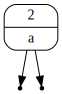

In [16]:
h = h.insert(2, 'a')
h.toDot()

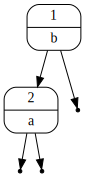

In [17]:
h = h.insert(1, 'b')
h.toDot()

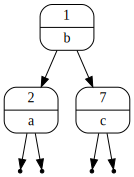

In [18]:
h = h.insert(7, 'c')
h.toDot()

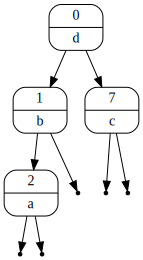

In [19]:
h = h.insert(0, 'd')
h.toDot()

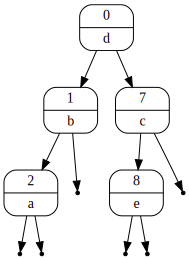

In [20]:
h = h.insert(8, 'e')
h.toDot()

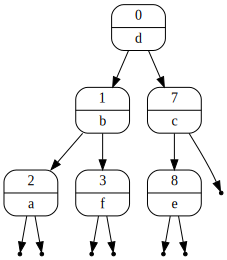

In [21]:
h = h.insert(3, 'f')
h.toDot()

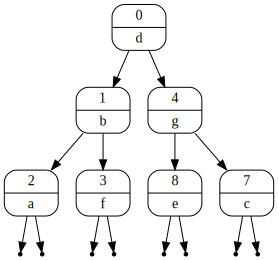

In [22]:
h = h.insert(4, 'g')
h.toDot()

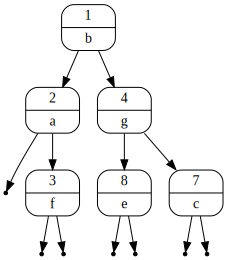

In [23]:
h = h.remove()
h.toDot()

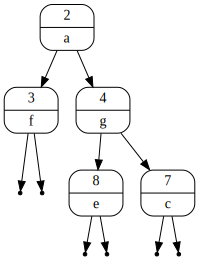

In [24]:
h = h.remove()
h.toDot()

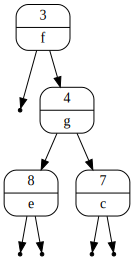

In [25]:
h = h.remove()
h.toDot()

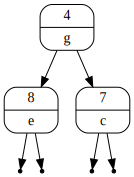

In [26]:
h = h.remove()
h.toDot()

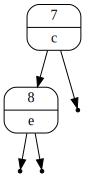

In [27]:
h = h.remove()
h.toDot()

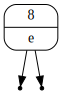

In [28]:
h = h.remove()
h.toDot()

In [29]:
h = h.remove()
h.toDot()

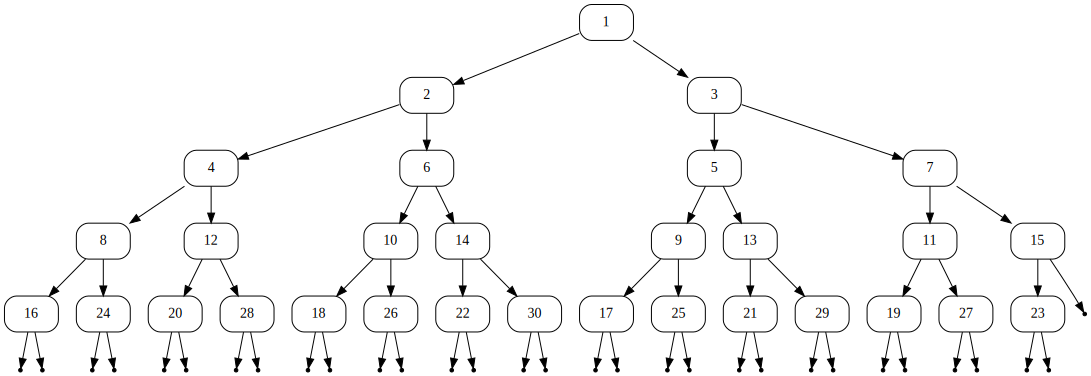

In [30]:
for i in range(1, 31):
    h = h.insert(i, None)
h.toDot()

## Heapsort

Given a list $L$, the method $\texttt{heap_sort}(L)$ returns a sorted version of $L$.

In [31]:
def heap_sort(L):
    H = Nil()
    for p in L:
        H = H.insert(p, None)
    S = []
    display(H.toDot())
    while isinstance(H, Node):
        p, _ = H.top()
        S.append(p)
        H = H.remove()
    return S

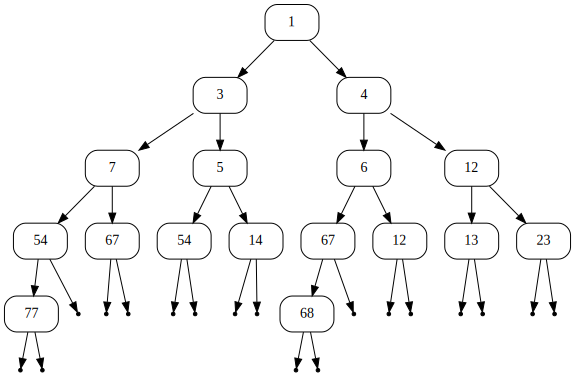

[1, 3, 4, 5, 6, 7, 12, 12, 13, 14, 23, 54, 54, 67, 67, 68, 77]

In [32]:
heap_sort([77, 54, 68, 7, 13, 1, 4, 5, 6, 3, 12, 67, 12, 14, 23, 54, 67])